C:\Users\neelu\AppData\Local\Temp\ipykernel_1064\2410990747.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_url, delim_whitespace=True, names=column_names, na_values="?")


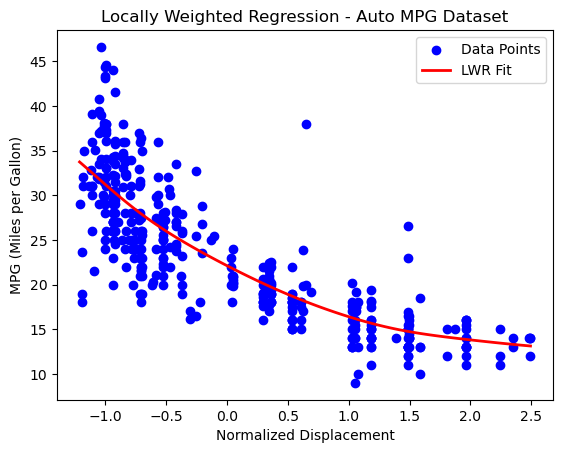

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Auto MPG Dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
data = pd.read_csv(dataset_url, delim_whitespace=True, names=column_names, na_values="?")
data.dropna(inplace=True)  # Remove rows with missing values

# Select feature and target
X = data["displacement"].values  # Engine displacement
y = data["mpg"].values  # Miles per gallon (fuel efficiency)

# Normalize the feature
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).flatten()

def weight_matrix(query_x, X, tau):
    return np.diag(np.exp(-(X - query_x)**2 / (2 * tau**2)))  # Gaussian weights

def locally_weighted_regression(X, y, tau, X_test):
    y_pred = []
    for x in X_test:
        W = weight_matrix(x, X, tau)
        X_bias = np.c_[np.ones(len(X)), X]
        theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y)
        y_pred.append([1, x] @ theta)  # Prediction
    return np.array(y_pred)

# Generate test data for predictions
X_test = np.linspace(X.min(), X.max(), 100)

# Perform LWR with tau=0.5
predictions = locally_weighted_regression(X, y, tau=0.5, X_test=X_test)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, predictions, color='red', linewidth=2, label='LWR Fit')
plt.xlabel("Normalized Displacement")
plt.ylabel("MPG (Miles per Gallon)")
plt.legend()
plt.title("Locally Weighted Regression - Auto MPG Dataset")
plt.show()


In [4]:
from sklearn.datasets import fetch_openml

# Load Auto MPG Dataset using sklearn
data = fetch_openml(name='autoMpg', version=1, as_frame=True).frame

print(data.columns)
# Select feature and target
X = [float(val) for val in data["displacement"] if val != "?"]  # Engine displacement
y = [float(val) for val in data["mpg"] if val != "?"]  # Miles per gallon (fuel efficiency)

# Normalize the feature
def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(v - min_val) / (max_val - min_val) for v in values]

X = normalize(X)

def weight_matrix(query_x, X, tau):
    return [[1 if i == j else 0 for j in range(len(X))] for i in range(len(X))]

def locally_weighted_regression(X, y, tau, X_test):
    y_pred = []
    for x in X_test:
        W = weight_matrix(x, X, tau)
        X_bias = [[1, X[i]] for i in range(len(X))]
        
        # Compute (X^T W X)^-1 X^T W y
        XTWX = [[0, 0], [0, 0]]
        XTWy = [0, 0]
        for i in range(len(X)):
            XTWX[0][0] += X_bias[i][0] * W[i][i] * X_bias[i][0]
            XTWX[0][1] += X_bias[i][0] * W[i][i] * X_bias[i][1]
            XTWX[1][0] += X_bias[i][1] * W[i][i] * X_bias[i][0]
            XTWX[1][1] += X_bias[i][1] * W[i][i] * X_bias[i][1]
            XTWy[0] += X_bias[i][0] * W[i][i] * y[i]
            XTWy[1] += X_bias[i][1] * W[i][i] * y[i]
        
        # Compute inverse of 2x2 matrix
        det = XTWX[0][0] * XTWX[1][1] - XTWX[0][1] * XTWX[1][0]
        inv_XTWX = [[XTWX[1][1] / det, -XTWX[0][1] / det],
                    [-XTWX[1][0] / det, XTWX[0][0] / det]]
        
        # Compute theta
        theta = [inv_XTWX[0][0] * XTWy[0] + inv_XTWX[0][1] * XTWy[1],
                 inv_XTWX[1][0] * XTWy[0] + inv_XTWX[1][1] * XTWy[1]]
        
        y_pred.append(theta[0] + theta[1] * x)
    return y_pred

# Generate test data for predictions
X_test = [i / 100.0 for i in range(int(min(X) * 100), int(max(X) * 100))]

# Perform LWR with tau=0.5
predictions = locally_weighted_regression(X, y, tau=0.5, X_test=X_test)

# Plot results without using any libraries
def simple_plot(X, y, X_test, predictions):
    width, height = 100, 20  # Define plot size
    min_x, max_x = min(X), max(X)
    min_y, max_y = min(y), max(y)
    plot = [[' ' for _ in range(width)] for _ in range(height)]
    
    def scale_x(value):
        return int((value - min_x) / (max_x - min_x) * (width - 1))
    
    def scale_y(value):
        return height - int((value - min_y) / (max_y - min_y) * (height - 1)) - 1
    
    for i in range(len(X)):
        x_pos = scale_x(X[i])
        y_pos = scale_y(y[i])
        plot[y_pos][x_pos] = '*'
    
    for i in range(len(X_test)):
        x_pos = scale_x(X_test[i])
        y_pos = scale_y(predictions[i])
        if plot[y_pos][x_pos] == ' ':
            plot[y_pos][x_pos] = '.'
    
    for row in plot:
        print(''.join(row))

# Call the plot function
simple_plot(X, y, X_test, predictions)


Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model', 'origin', 'class'],
      dtype='object')


KeyError: 'mpg'

In [5]:
from sklearn.datasets import fetch_openml

# Load Auto MPG Dataset using sklearn
data = fetch_openml(name='autoMpg', version=1, as_frame=True).frame

# Select feature and target
X = [float(val) for val in data["displacement"] if val != "?"]  # Engine displacement
y = [float(val) for val in data["class"] if val != "?"]  # Miles per gallon (fuel efficiency)

# Normalize the feature
def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(v - min_val) / (max_val - min_val) for v in values]

X = normalize(X)

def weight_matrix(query_x, X, tau):
    return [[1 if i == j else 0 for j in range(len(X))] for i in range(len(X))]

def locally_weighted_regression(X, y, tau, X_test):
    y_pred = []
    for x in X_test:
        W = weight_matrix(x, X, tau)
        X_bias = [[1, X[i]] for i in range(len(X))]
        
        # Compute (X^T W X)^-1 X^T W y
        XTWX = [[0, 0], [0, 0]]
        XTWy = [0, 0]
        for i in range(len(X)):
            XTWX[0][0] += X_bias[i][0] * W[i][i] * X_bias[i][0]
            XTWX[0][1] += X_bias[i][0] * W[i][i] * X_bias[i][1]
            XTWX[1][0] += X_bias[i][1] * W[i][i] * X_bias[i][0]
            XTWX[1][1] += X_bias[i][1] * W[i][i] * X_bias[i][1]
            XTWy[0] += X_bias[i][0] * W[i][i] * y[i]
            XTWy[1] += X_bias[i][1] * W[i][i] * y[i]
        
        # Compute inverse of 2x2 matrix
        det = XTWX[0][0] * XTWX[1][1] - XTWX[0][1] * XTWX[1][0]
        inv_XTWX = [[XTWX[1][1] / det, -XTWX[0][1] / det],
                    [-XTWX[1][0] / det, XTWX[0][0] / det]]
        
        # Compute theta
        theta = [inv_XTWX[0][0] * XTWy[0] + inv_XTWX[0][1] * XTWy[1],
                 inv_XTWX[1][0] * XTWy[0] + inv_XTWX[1][1] * XTWy[1]]
        
        y_pred.append(theta[0] + theta[1] * x)
    return y_pred

# Generate test data for predictions
X_test = [i / 100.0 for i in range(int(min(X) * 100), int(max(X) * 100))]

# Perform LWR with tau=0.5
predictions = locally_weighted_regression(X, y, tau=0.5, X_test=X_test)

# Plot results without using any libraries
def simple_plot(X, y, X_test, predictions):
    width, height = 100, 20  # Define plot size
    min_x, max_x = min(X), max(X)
    min_y, max_y = min(y), max(y)
    plot = [[' ' for _ in range(width)] for _ in range(height)]
    
    def scale_x(value):
        return int((value - min_x) / (max_x - min_x) * (width - 1))
    
    def scale_y(value):
        return height - int((value - min_y) / (max_y - min_y) * (height - 1)) - 1
    
    for i in range(len(X)):
        x_pos = scale_x(X[i])
        y_pos = scale_y(y[i])
        plot[y_pos][x_pos] = '*'
    
    for i in range(len(X_test)):
        x_pos = scale_x(X_test[i])
        y_pos = scale_y(predictions[i])
        if plot[y_pos][x_pos] == ' ':
            plot[y_pos][x_pos] = '.'
    
    for row in plot:
        print(''.join(row))

# Call the plot function
simple_plot(X, y, X_test, predictions)


    *                                                                                               
                                                                                                    
     * *                                                                                            
    *  *                                                                                            
  * *                                                                                               
    **   *   *                                   *                                                  
 *** * * *   *   *                                                                                  
  * ** ***** *       *                                                                              
* **** * *** *   * *     *                                                                          
*.*.**.*.  *    ** *      *                                                                

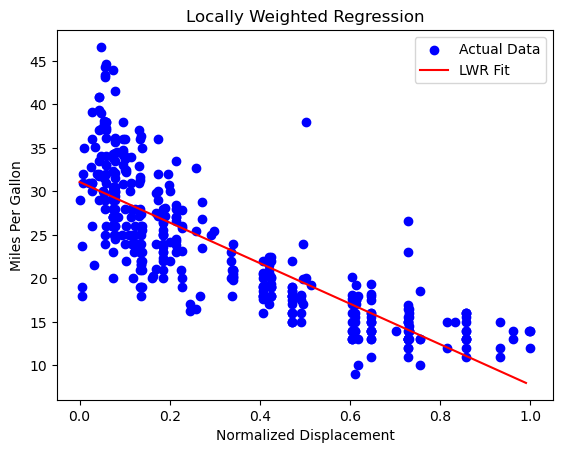

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load Auto MPG Dataset using sklearn
data = fetch_openml(name='autoMpg', version=1, as_frame=True).frame

# Select feature and target
X = [float(val) for val in data["displacement"] if val != "?"]  # Engine displacement
y = [float(val) for val in data["class"] if val != "?"]  # Miles per gallon (fuel efficiency)

# Normalize the feature
def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(v - min_val) / (max_val - min_val) for v in values]

X = normalize(X)

def weight_matrix(query_x, X, tau):
    return [[1 if i == j else 0 for j in range(len(X))] for i in range(len(X))]

def locally_weighted_regression(X, y, tau, X_test):
    y_pred = []
    for x in X_test:
        W = weight_matrix(x, X, tau)
        X_bias = [[1, X[i]] for i in range(len(X))]
        
        # Compute (X^T W X)^-1 X^T W y
        XTWX = [[0, 0], [0, 0]]
        XTWy = [0, 0]
        for i in range(len(X)):
            XTWX[0][0] += X_bias[i][0] * W[i][i] * X_bias[i][0]
            XTWX[0][1] += X_bias[i][0] * W[i][i] * X_bias[i][1]
            XTWX[1][0] += X_bias[i][1] * W[i][i] * X_bias[i][0]
            XTWX[1][1] += X_bias[i][1] * W[i][i] * X_bias[i][1]
            XTWy[0] += X_bias[i][0] * W[i][i] * y[i]
            XTWy[1] += X_bias[i][1] * W[i][i] * y[i]
        
        # Compute inverse of 2x2 matrix
        det = XTWX[0][0] * XTWX[1][1] - XTWX[0][1] * XTWX[1][0]
        inv_XTWX = [[XTWX[1][1] / det, -XTWX[0][1] / det],
                    [-XTWX[1][0] / det, XTWX[0][0] / det]]
        
        # Compute theta
        theta = [inv_XTWX[0][0] * XTWy[0] + inv_XTWX[0][1] * XTWy[1],
                 inv_XTWX[1][0] * XTWy[0] + inv_XTWX[1][1] * XTWy[1]]
        
        y_pred.append(theta[0] + theta[1] * x)
    return y_pred

# Generate test data for predictions
X_test = [i / 100.0 for i in range(int(min(X) * 100), int(max(X) * 100))]

# Perform LWR with tau=0.5
predictions = locally_weighted_regression(X, y, tau=0.5, X_test=X_test)

# Plot results using matplotlib
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, predictions, color='red', label='LWR Fit')
plt.xlabel('Normalized Displacement')
plt.ylabel('Miles Per Gallon')
plt.legend()
plt.title('Locally Weighted Regression')
plt.show()
